<a href="https://colab.research.google.com/github/kishore-n-george/Naive-Bayes/blob/main/movie__review_classifier%2B_%2Bbernoulli%2BNaive%2BBayes_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [51]:
import pandas as pd

# reading the training data
docs = pd.read_csv('movie_review_train.csv')
docs.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [52]:
# number of SMSes / documents
len(docs)

1600

In [53]:
# counting spam and ham instances
ham_spam = docs['class'].value_counts()
ham_spam

Pos    800
Neg    800
Name: class, dtype: int64

In [54]:
print("neg rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

neg rate is about 50%


In [55]:
# mapping labels to 0 and 1
docs['label'] = docs['class'].map({'Pos':1, 'Neg':0})

In [56]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [57]:
# we can now drop the column 'Class'
docs = docs.drop('class', axis=1)
docs.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [58]:
# convert to X and y
X = docs.text
y = docs.label
print(X.shape)
print(y.shape)

(1600,)
(1600,)


In [59]:
# splitting into test and train
# from sklearn.model_selection  import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [60]:
X_train = X
X_train.head()
X_train.shape

(1600,)

In [61]:
y_train = y
y_train.head()
y_train.shape

(1600,)

In [62]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [63]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [64]:
# printing the vocabulary
vect.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [65]:
# vocab size
len(vect.vocabulary_.keys())

35858

In [66]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',min_df=.03, max_df=.8)

In [67]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [68]:
# printing the vocabulary
vect.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [69]:
# vocab size
len(vect.vocabulary_.keys())

1643

In [70]:
test = pd.read_csv('movie_review_test.csv')

In [71]:
test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [72]:
# mapping labels to 0 and 1
test['label'] = test['class'].map({'Pos':1, 'Neg':0})

In [73]:
test.head()

,class,text,label
0,Pos,films adapted from comic books have had plent...,1
1,Pos,every now and then a movie comes along from a...,1
2,Pos,you ve got mail works alot better than it des...,1
3,Pos,jaws is a rare film that grabs your atte...,1
4,Pos,moviemaking is a lot like being the general m...,1


In [74]:
# we can now drop the column 'Class'
test = test.drop('class', axis=1)
test.head()

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1


In [75]:
# convert to X and y
X_test = test.text
y_test = test.label
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [76]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [77]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 4)	1
  (0, 59)	2
  (0, 72)	1
  (0, 78)	1
  (0, 81)	1
  (0, 99)	3
  (0, 101)	1
  (0, 192)	1
  (0, 211)	1
  (0, 213)	1
  (0, 220)	1
  (0, 264)	2
  (0, 287)	1
  (0, 316)	1
  (0, 323)	1
  (0, 328)	1
  (0, 340)	1
  (0, 342)	1
  (0, 357)	1
  (0, 386)	1
  (0, 413)	2
  (0, 445)	2
  (0, 464)	1
  (0, 503)	1
  (0, 506)	1
  :	:
  (1599, 1247)	1
  (1599, 1258)	2
  (1599, 1267)	1
  (1599, 1271)	1
  (1599, 1331)	1
  (1599, 1335)	1
  (1599, 1339)	1
  (1599, 1366)	3
  (1599, 1371)	1
  (1599, 1375)	1
  (1599, 1379)	1
  (1599, 1413)	1
  (1599, 1421)	1
  (1599, 1429)	2
  (1599, 1447)	1
  (1599, 1501)	1
  (1599, 1533)	1
  (1599, 1550)	1
  (1599, 1555)	1
  (1599, 1556)	1
  (1599, 1570)	1
  (1599, 1579)	2
  (1599, 1589)	1
  (1599, 1609)	1
  (1599, 1616)	1


In [78]:
print(type(X_test_transformed))
print(X_test_transformed)
X_test_transformed.count_nonzero()

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 11)	1
  (0, 18)	2
  (0, 23)	1
  (0, 29)	1
  (0, 31)	1
  (0, 53)	1
  (0, 73)	1
  (0, 94)	1
  (0, 110)	1
  (0, 118)	1
  (0, 133)	1
  (0, 134)	1
  (0, 140)	1
  (0, 141)	1
  (0, 151)	3
  (0, 152)	1
  (0, 173)	1
  (0, 176)	1
  (0, 177)	1
  (0, 188)	2
  (0, 189)	1
  (0, 195)	1
  (0, 197)	1
  (0, 203)	1
  (0, 206)	1
  :	:
  (399, 1314)	2
  (399, 1325)	1
  (399, 1354)	1
  (399, 1371)	1
  (399, 1375)	2
  (399, 1382)	1
  (399, 1399)	2
  (399, 1411)	1
  (399, 1416)	1
  (399, 1418)	1
  (399, 1430)	1
  (399, 1463)	2
  (399, 1471)	1
  (399, 1475)	1
  (399, 1514)	2
  (399, 1516)	1
  (399, 1542)	1
  (399, 1546)	2
  (399, 1549)	1
  (399, 1609)	3
  (399, 1632)	1
  (399, 1633)	3
  (399, 1637)	1
  (399, 1638)	1
  (399, 1641)	2


51663

### 2. Building and Evaluating the Model

In [79]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_transformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_transformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.79

In [80]:
# note that alpha=1 is used by default for smoothing
bnb

BernoulliNB()

In [43]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [81]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[177,  23],
       [ 61, 139]])

### Model Evaluation

In [ ]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [ ]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[1201,    7],
       [  10,  175]])

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1201    7]
 [  10  175]]


In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9459459459459459


In [ ]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9942052980132451


In [ ]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9615384615384616
0.9615384615384616


In [ ]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


In [ ]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_pred_proba

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [ ]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# area under the curve
print (roc_auc)

0.9921872203329157


In [ ]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.308108,1.000000e+00
2,0.000000,0.313514,1.000000e+00
3,0.000000,0.335135,1.000000e+00
4,0.000000,0.340541,1.000000e+00
5,0.000000,0.351351,1.000000e+00
6,0.000000,0.367568,1.000000e+00
7,0.000000,0.400000,1.000000e+00
8,0.000000,0.410811,1.000000e+00
9,0.000000,0.594595,1.000000e+00


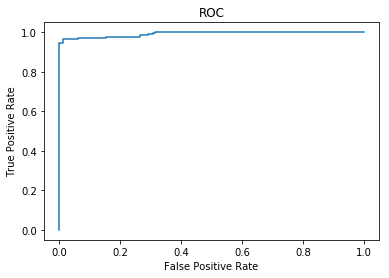

In [ ]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)